In [33]:
from utils.data_loader import load_data, load_file, convert_signal
import utils.cop as Cop
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib widget


In [34]:
subject = 'mci018'
day = '2024-04-15'
sessions = ['350']
files = {}
root_folder = "./MCI analysis"

root = f"{root_folder}/data/{subject}"
dates = os.listdir(root)

files = []
for file in os.listdir(f"{root}/{day}"):
    match = re.search(r"S(\d+)_", file)
    session = match.group(1)
    if session in sessions:
        files.append(os.path.join(root, day, file))
        
files


['./MCI analysis/data/mci018\\2024-04-15\\S350_20240415_rawDataLeft_4XYXFKBcZm.txt',
 './MCI analysis/data/mci018\\2024-04-15\\S350_20240415_rawDataRight_4XYXFKBcZm.txt']

In [35]:
raw_left = load_file(files[0])
raw_right = load_file(files[1])

time = {}
time['left'] = [x * 0.05 for x in range(len(raw_left))]
time['right'] = [x * 0.05 for x in range(len(raw_right))]

--------------
reading data file ./MCI analysis/data/mci018\2024-04-15\S350_20240415_rawDataLeft_4XYXFKBcZm.txt
21 columns found
--------------
reading data file ./MCI analysis/data/mci018\2024-04-15\S350_20240415_rawDataRight_4XYXFKBcZm.txt
21 columns found


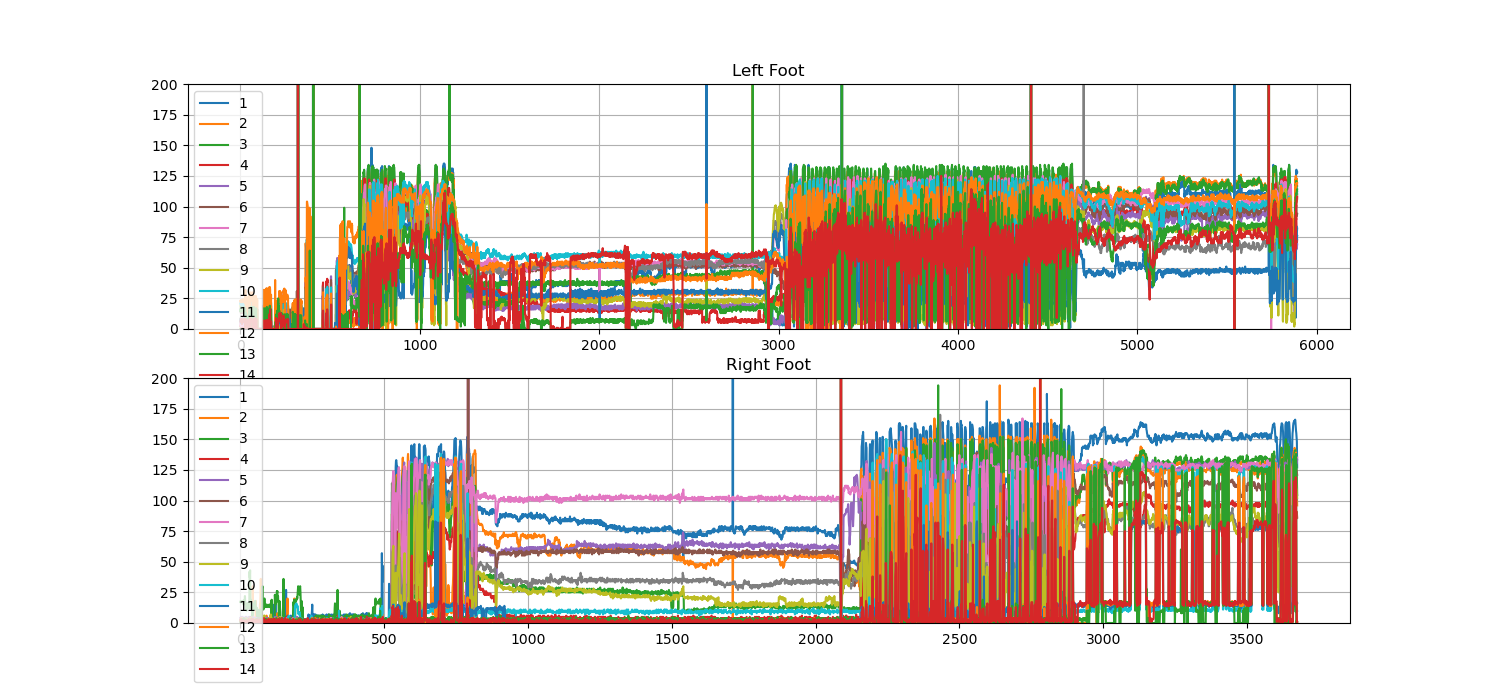

In [38]:
d = raw_left[['raw_1', 'raw_2', 'raw_3', 'raw_4', 'raw_5', 'raw_6',
                'raw_7', 'raw_8', 'raw_9', 'raw_10', 'raw_11', 'raw_12',
                'raw_13', 'raw_14']]

plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
for col in d.columns:
    plt.plot(d[col], label=col.split('_')[1])
    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.title('Left Foot')
plt.ylim([0,200])

d = raw_right[['raw_1', 'raw_2', 'raw_3', 'raw_4', 'raw_5', 'raw_6',
                'raw_7', 'raw_8', 'raw_9', 'raw_10', 'raw_11', 'raw_12',
                'raw_13', 'raw_14']]

plt.subplot(2,1,2)
for col in d.columns:
    plt.plot(d[col], label=col.split('_')[1])
    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.title('Right Foot')
plt.ylim([0,200])


plt.show()

Generating Mask...
[False False False ... False False False]


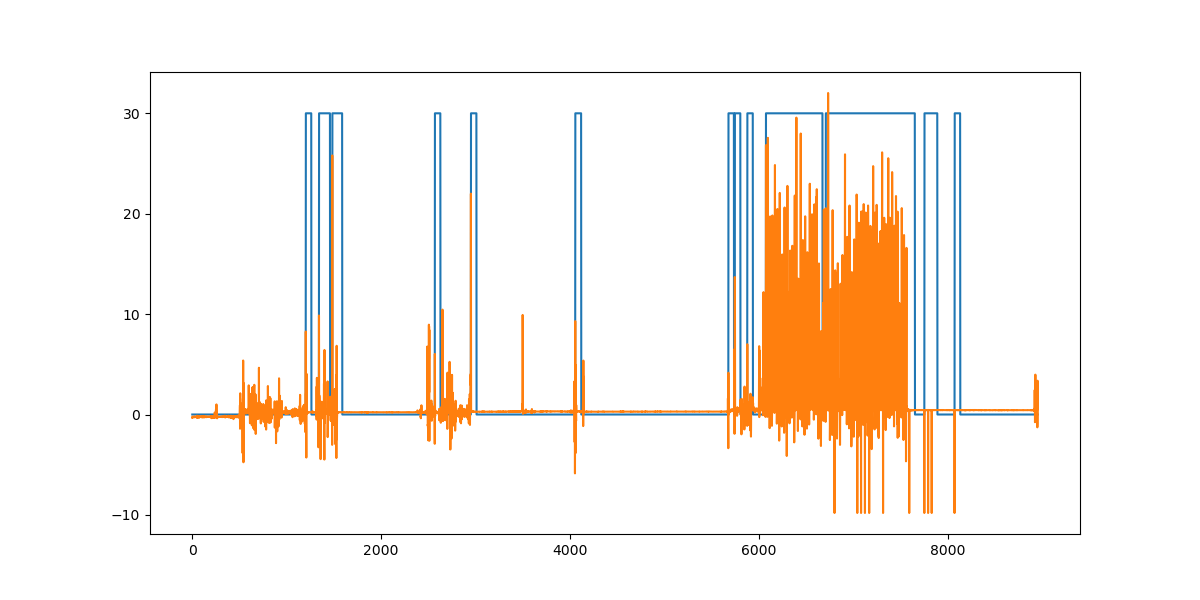

In [29]:
acc = {}
acc['left'] = convert_signal(raw_left, "acc_total")
acc['right'] = convert_signal(raw_right, "acc_total")


pressure = {}
pressure['left'] = convert_signal(raw_left, "pressure")
pressure['right'] = convert_signal(raw_right, "pressure")

def generate_mask(signal, freq, threshold=7, seconds=3):
    print("Generating Mask...")
    window = int(seconds / freq)
    active = False
    c = window + 1  # to start with no activity
    count = []

    diff = signal.diff()

    for i, x in enumerate(diff):
        if i <= window:
            c += 1
            count.append(c)
            continue

        if x > threshold:
            active = True
            c = 0

        if active and c < window:
            c += 1
            count.append(c)
            continue

        if c > window:
            active = not active

        c += 1
        count.append(c)

    return np.array([True if x < window else False for x in count])


mask = generate_mask(acc['left'], 0.05)
print(mask)
plt.figure(figsize=(12, 6))

# plot the mask
plt.plot([30 if x else 0 for x in mask])
plt.plot(acc['left'])
# plt.plot(pressure['left'])
plt.show()

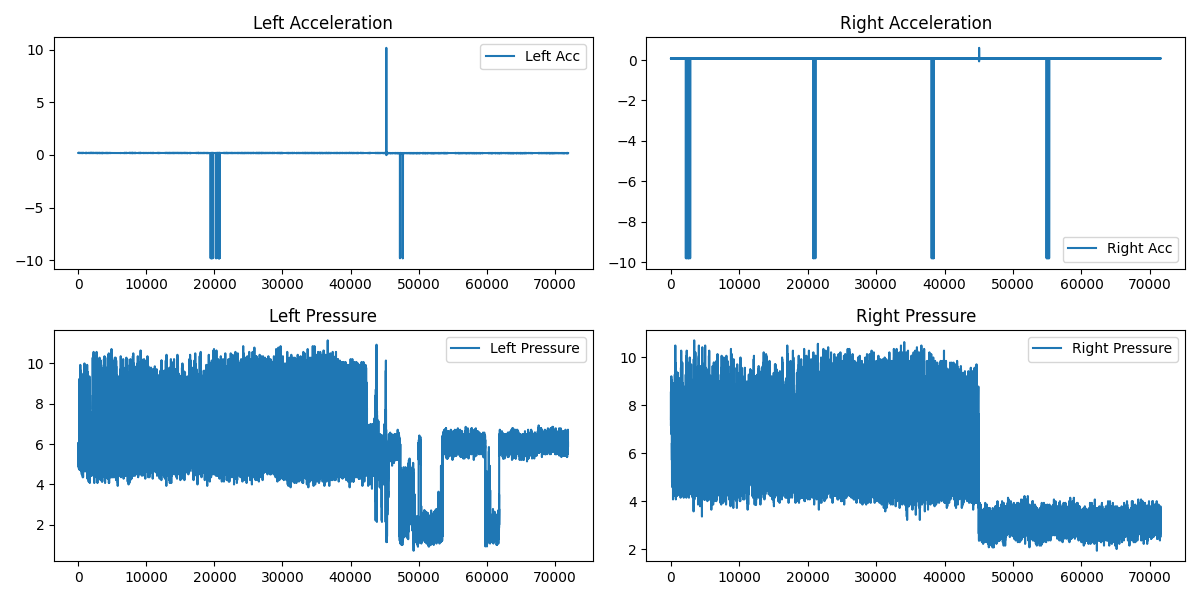

In [27]:
# Plotting Acceleration
plt.figure(figsize=(12, 6))

# Left Acceleration
plt.subplot(2, 2, 1)
plt.plot(acc['left'], label='Left Acc')
plt.title('Left Acceleration')
plt.legend()

# Right Acceleration
plt.subplot(2, 2, 2)
plt.plot(acc['right'], label='Right Acc')
plt.title('Right Acceleration')
plt.legend()

# Plotting Pressure
# Left Pressure
plt.subplot(2, 2, 3)
plt.plot(pressure['left'], label='Left Pressure')
plt.title('Left Pressure')
plt.legend()

# Right Pressure
plt.subplot(2, 2, 4)
plt.plot(pressure['right'], label='Right Pressure')
plt.title('Right Pressure')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
raw_left = load_file(files[0], filter=True)
raw_right = load_file(files[1], filter=True)

cop = {}

c = Cop.CenterOfPressure([raw_left, raw_right], drop_sensors=[[7,8,9],[7,8,9]])

side = 'left'
cop[side] = c.get_cop_foot(side)
xl = cop[side][1]

side = 'right'
cop[side] = c.get_cop_foot(side)
xr = cop[side][1]

--------------
reading data file ./COP analysis/data/mci003\2024-03-05\S152_20240305_rawDataLeft_vuQAzlAArG.txt
21 columns found
Filtering data
--------------
reading data file ./COP analysis/data/mci003\2024-03-05\S152_20240305_rawDataRight_vuQAzlAArG.txt
21 columns found
Filtering data


c:\Users\joonn\Desktop\pyscript\COP analysis\utils\cop.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.left_data.drop(columns=[f"raw_{s}" for s in drop_sensors[0]], inplace=True)
c:\Users\joonn\Desktop\pyscript\COP analysis\utils\cop.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.right_data.drop(columns=[f"raw_{s}" for s in drop_sensors[1]], inplace=True)


<AxesSubplot: >

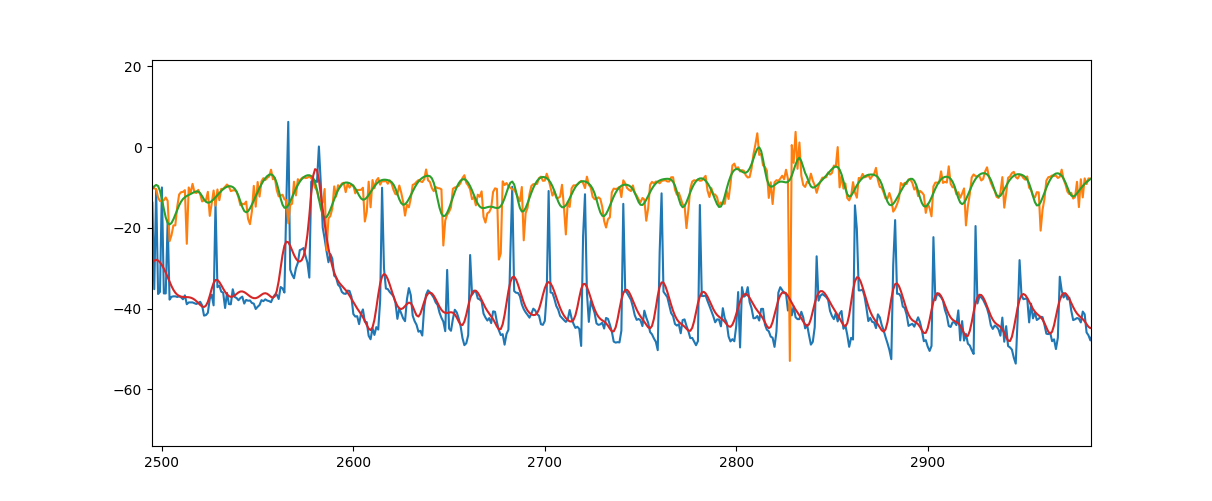

In [22]:
xl.plot()

<AxesSubplot: >

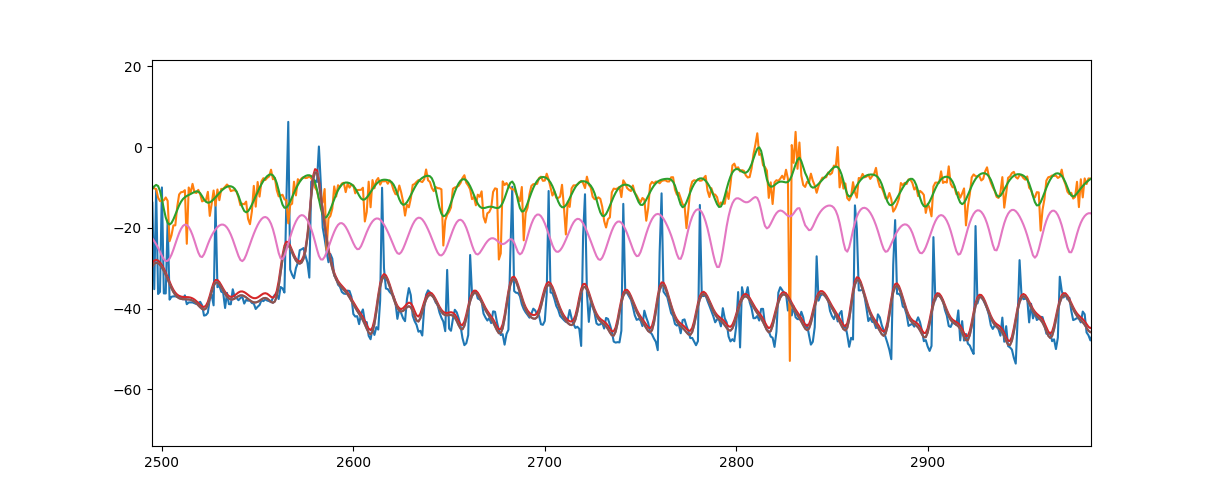

In [25]:
xr.plot()